##**David Alejandro Vásquez Franco**

##**CC 1000921301**


<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Sesiones/Laboratorio_redes_neuronales_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio redes neuronales convolucionales

Objetivo: Implementar un red neuronal LeNet5 empleando keras e implementar una red neuronal  VGG.  




1. Importar las librerias:
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow import keras
```

2. Cargar los datos de entrenamiento y test
```python
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
```


3. Normalizar los datos.

4. Realizar una visualización de 20 imagenes aproximadamente, puede emplear el comando imshow con cmap= binary

```python
  ax.imshow(X_train[i],cmap='binary')
```


5. Implementar en keras, la red Letnet5, la arquitectura de la red es la siguiente:

![img](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/LeNet5.png?raw=true)


Par la implementación, se recomienda construir un modelo secuencial.


```python
keras.backend.clear_session()
models=keras.models.Sequential([...])

```

algunos parámetros que pueden ser pasados dentro de los tres puntos anteriores son:


```python
keras.layers.MaxPool2D,
keras.layers.Conv2D,
keras.layers.Flatten,
keras.layers.Dense
```

Revisa la documentación para pasar los valores adecuados.


6. Revisa el modelo que acabaste de construir.
```python
model.summary()
```


7. Vamos a utlizar un optimizador de Adams,  El optimizador de Adam (Adaptive Moment Estimation) combina las ventajas de los algoritmos RMSProp y Momentum para mejorar el proceso de aprendizaje de un modelo. Al igual que Momentum, Adam utiliza una estimación del momento y de la magnitud de los gradientes  para actualizar los parámetros del modelo en cada iteración. Sin embargo, en lugar de utilizar una tasa de aprendizaje constante para todos los parámetros, Adam adapta la tasa de aprendizaje de cada parámetro individualmente en función de su estimación del momento y de la magnitud del gradiente. Esto permite que el modelo se ajuste de manera más eficiente y efectiva a los datos de entrenamiento, lo que puede llevar a una mayor precisión de la predicción en comparación con otros métodos de optimización.


El optimizador de Adam es un algoritmo de optimización basado en gradientes de primer orden que utiliza estimaciones adaptativas de momentos de primer y segundo orden. El algoritmo se puede describir de la siguiente forma :

$$
\begin{aligned}
& \text{Inicializar:} \quad \theta_0, \alpha, \beta_1, \beta_2, \epsilon \\
& \text{Para cada iteración } t = 1, 2, \dots \\
& \quad \text{Obtener el gradiente:} \quad g_t = \nabla_\theta J(\theta_{t-1}) \\
& \quad \text{Actualizar los momentos de primer orden:} \quad m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
& \quad \text{Actualizar los momentos de segundo orden:} \quad v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
& \quad \text{Corregir el sesgo de los momentos de primer orden:} \quad \hat{m}_t = \frac{m_t}{1 - \beta_1^t} \\
& \quad \text{Corregir el sesgo de los momentos de segundo orden:} \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} \\
& \quad \text{Actualizar los parámetros:} \quad \theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
\end{aligned}
$$

Donde $\theta$ son los parámetros del modelo, $\alpha$ es la tasa de aprendizaje, $\beta_1$ y $\beta_2$ son los factores de decaimiento de los momentos, $\epsilon$ es un término de suavizado para evitar la división por cero, $J$ es la función objetivo, $g_t$ es el gradiente en la iteración $t$, $m_t$ y $v_t$ son los momentos de primer y segundo orden respectivamente, y $\hat{m}_t$ y $\hat{v}_t$ son las correcciones de sesgo de los momentos.




emplea el siguiente compilador del modelo
```python
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 ```


 8. Realiza el fit del modelo, emplea GPU, para ello cambia la configuración de collaboratory para que tu modelo se ejecute un poco mas rápido.


 ```python
 history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)
```


- Loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de entrenamiento. Es una función que se quiere minimizar durante el entrenamiento. Un valor bajo de loss indica que el modelo se ajusta bien a los datos de entrenamiento.
- Accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de entrenamiento. Es una métrica que se quiere maximizar durante el entrenamiento. Un valor alto de accuracy indica que el modelo clasifica bien los datos de entrenamiento.
- Val_loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de validación. Los datos de validación son un subconjunto de los datos de entrenamiento que se reservan para evaluar el rendimiento del modelo durante el entrenamiento. Un valor bajo de val_loss indica que el modelo se generaliza bien a los datos de validación.
- Val_accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de validación. Un valor alto de val_accuracy indica que el modelo clasifica bien los datos de validación.

9. Realiza la predicción:
```python
q=model.predict(X_test)
```

10. Muestra los valores de q y determina que numero se esta prediciendo.


11. Puede graficar la convergencia del modelo con los siguiente código
```python
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()
```



12. Una forma alterna de implementar el modelo puede ser dada de la siguiente forma:



```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

```


13. Emplea la arquitectura anterior para el  
  el dataset cifar100,  empleando BatchNormalization y dropout.


- BatchNormalization es una técnica que se usa para acelerar y estabilizar el entrenamiento de las redes neuronales artificiales, mediante la normalización de las entradas de cada capa, re-centrando y re-escalando los datos.

  BatchNormalization se aplica justo antes de la función de activación de cada capa, y consiste en centrar y normalizar cada mini-lote con una media y una desviación estándar calculadas con los datos del mini-lote, y luego re-escalar y desplazar los datos de nuevo con parámetros aprendidos por la red durante el entrenamiento. Estos parámetros permiten que la red se adapte a la distribución óptima de las activaciones para cada capa. Además, al introducir cierto ruido en los datos, BatchNormalization actúa como una regularización y ayuda a reducir el sobreajuste.


- El dropout es una técnica de regularización para reducir el sobreajuste en redes neuronales artificiales. El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalizar a nuevos datos. El dropout consiste en eliminar aleatoriamente algunas neuronas de la red durante el entrenamiento, lo que hace que el modelo sea más robusto y menos dependiente de ciertas conexiones. El dropout se puede interpretar como una forma de promediar varios modelos más pequeños y diferentes, lo que mejora el rendimiento final.

  El dropout se aplica a cada capa de la red, especificando una probabilidad de mantener cada neurona activa. Por ejemplo, si se usa un dropout de 0.2, significa que el 20% de las neuronas se desactivarán en cada iteración del entrenamiento. El dropout solo se usa durante el entrenamiento, no durante la inferencia o la evaluación. El dropout se puede combinar con otras técnicas de regularización, como la normalización de pesos o la normalización por lotes.




```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras


(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()


plt.imshow(train_image[30])
plt.axis('off')
```

intenta agregar, lineas como las siguientes en los lugares mas estrategicos:


```python
keras.layers.Dropout(0.2),
keras.layers.BatchNormalization()
```

14. Emplea el siguiente compilador:

El optimizador de NAdam (Nesterov-accelerated Adaptive Moment Estimation) es una variante de Adam que incorpora el método de Nesterov, que consiste en utilizar una predicción de la posición futura de los parámetros para calcular el gradiente, en lugar de la posición actual. Esto hace que el algoritmo sea más sensible a los cambios de dirección del gradiente y evite oscilaciones innecesarias. NAdam también modifica la forma de calcular el momento y la magnitud del gradiente, usando una media móvil exponencial sesgada hacia cero en lugar de una media móvil exponencial simple.


```python
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

El número de épocas que se necesita para entrenar una red neuronal depende de varios factores, como el tamaño de los datos, la complejidad del modelo, la función de pérdida, el algoritmo de optimización, la tasa de aprendizaje, etc. No hay una regla fija para elegir el número de épocas, pero se puede usar el criterio de parada temprana, que consiste en monitorear el error de validación y detener el entrenamiento cuando este empiece a aumentar, lo que indica un sobreajuste del modelo.

15. Emplea early_stooping y realiza el fit



```python
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
```

El parámetro patience=5 indica el número de épocas sin mejora después de las cuales se detendrá el entrenamiento. El parámetro restore_best_weights=True indica que se restaurarán los pesos del modelo desde la época con el mejor valor de la métrica monitoreada. Esto puede ayudar a evitar el sobreajuste y mejorar el rendimiento del modelo



```python
history = model.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])
```

Ahora vamos a implementar una red VGG16, para ello puedes emplear la siguiente linea de código:


```python
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg -O african_elephant.jpg
#!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

# Choose the elephant to be classified
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)
```


```python
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

```


```python
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)# Añadir una dimensión extra para el lote
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])
```

# **Solución**

## **1. Importar las librerías**

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set()

from tensorflow import keras

print(f"Versión de Keras: {keras.__version__}")

Versión de Keras: 3.10.0


## **2. Cargar los datos de entrenamiento y test**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Dimensiones de X_train: (60000, 28, 28)
Dimensiones de X_test: (10000, 28, 28)


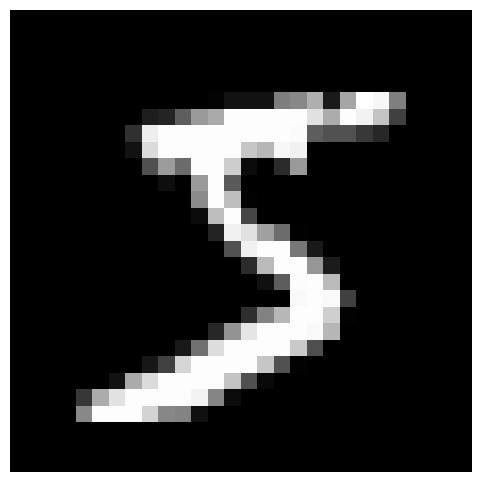

Etiqueta de la imagen: 5


In [2]:
# Cargamos el dataset MNIST desde Keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Escalamiento de datos (Normalización)
# Las redes neuronales funcionan mejor con números pequeños (entre 0 y 1)
# Dividimos por 255.0 porque es el valor máximo de un píxel
X_train = X_train / 255.0
X_test = X_test / 255.0

# Verificamos las dimensiones
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")

# Visualización de un ejemplo
plt.figure(figsize=(6, 6))
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

print(f"Etiqueta de la imagen: {y_train[0]}")

## **3. Normalizar los datos.**

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Mínimo: {X_train.min()}")
print(f"Máximo: {X_train.max()}")

Mínimo: 0.0
Máximo: 0.00392156862745098


## **4. Realizar una visualización de 20 imagenes aproximadamente, puede emplear el comando imshow con cmap= binary**

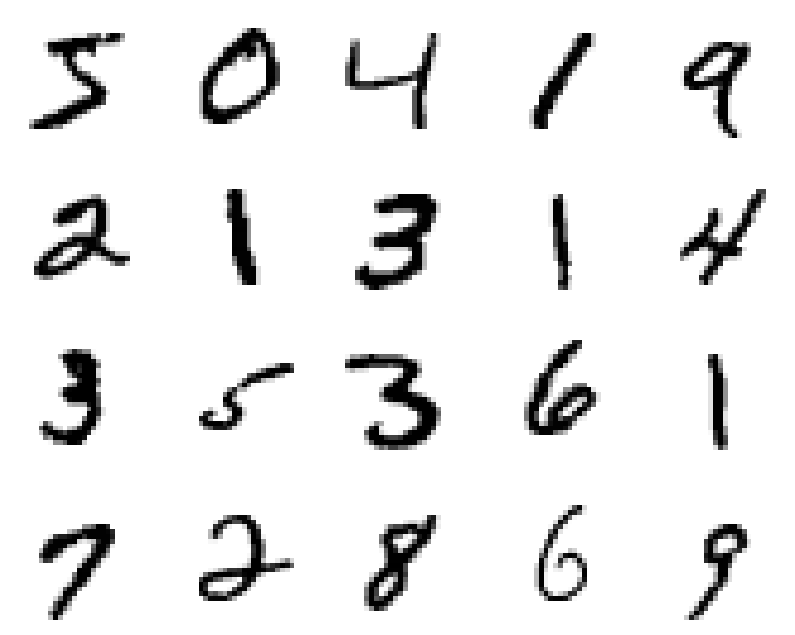

In [4]:
plt.figure(figsize=(10, 8))

# Iteramos para mostrar las primeras 20 imágenes
for i in range(20):
    ax = plt.subplot(4, 5, i + 1)

    # Mostramos la imagen usando el mapa de color 'binary'
    ax.imshow(X_train[i], cmap='binary')

    plt.axis('off')

plt.show()

## **5. Implementar en keras, la red Letnet5**

In [5]:
# Añadir el canal de color (1)
# Convertimos de (60000, 28, 28) a (60000, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Dimensiones ajustadas para Conv2D: {X_train.shape}")

# Modelo
keras.backend.clear_session()

model = keras.models.Sequential([

    # Capa de Entrada
    keras.layers.InputLayer(input_shape=(28, 28, 1)),

    # --- C1: Primera Convolución ---
    # 6 filtros, ventana 5x5.
    # Usamos padding='same' para mantener 28x28 y simular la entrada original de LeNet (que era 32x32)
    keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same'),

    # --- S2: Submuestreo (Pooling) ---
    keras.layers.AveragePooling2D(pool_size=2, strides=2),

    # --- C3: Segunda Convolución ---
    keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', padding='valid'),

    # --- S4: Segundo Submuestreo ---
    keras.layers.AveragePooling2D(pool_size=2, strides=2),

    # --- C5 / F6: Aplanado y Densa ---
    keras.layers.Flatten(),

    # Capa densa de 120 neuronas
    keras.layers.Dense(units=120, activation='relu'),

    # Capa densa de 84 neuronas
    keras.layers.Dense(units=84, activation='relu'),

    # --- Salida ---
    # 10 neuronas (dígitos 0-9) con probabilidad Softmax
    keras.layers.Dense(units=10, activation='softmax')
])

Dimensiones ajustadas para Conv2D: (60000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


## **6. Revisa el modelo que acabaste de construir.**

In [6]:
# Mostramos el resumen de la arquitectura
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

## **7. Vamos a utlizar un optimizador de Adams... emplea el siguiente compilador del modelo**

In [7]:
# Compilamos el modelo indicando optimizador, función de pérdida y métrica
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **8. Realiza el fit del modelo, emplea GPU... history = model.fit(X_train, y_train, epochs=10, validation_split=0.3)**

In [8]:
# Entrenamos el modelo
# validation_split=0.3: Separa el 30% de los datos para evaluarse a sí misma en cada vuelta (no aprende de ellos).
history = model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.5603 - loss: 1.2616 - val_accuracy: 0.8942 - val_loss: 0.3327
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9003 - loss: 0.3182 - val_accuracy: 0.9277 - val_loss: 0.2294
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9324 - loss: 0.2134 - val_accuracy: 0.9412 - val_loss: 0.1865
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.9498 - loss: 0.1651 - val_accuracy: 0.9468 - val_loss: 0.1691
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.9571 - loss: 0.1365 - val_accuracy: 0.9619 - val_loss: 0.1224
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9657 - loss: 0.1112 - val_accuracy: 0.9591 - val_loss: 0.1301
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9709 - loss: 0.0922 - val_accuracy: 0.9671 - val_loss: 0.1083
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.9732 -

## **9. Realiza la predicción: q = model.predict(X_test)**

In [10]:
# Realizamos la predicción sobre todo el conjunto de prueba
q = model.predict(X_test)
print(f"Forma de q: {q.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Forma de q: (10000, 10)


## **10. Muestra los valores de q y determina que numero se esta prediciendo.**

In [11]:
# Seleccionamos la predicción de la primera imagen (índice 0)
prediccion_imagen_0 = q[0]

print("Vector de probabilidades (q[0]):")
print(prediccion_imagen_0)

# Buscamos cuál es la posición del valor más alto
numero_predicho = np.argmax(prediccion_imagen_0)

print(f"\n El modelo dice que es un: {numero_predicho}")
print(f" La etiqueta real es: {y_test[0]}")

# Verificación rápida
if numero_predicho == y_test[0]:
    print("Correcto")
else:
    print("Falló")

Vector de probabilidades (q[0]):
[1.2790657e-08 8.0446455e-08 9.9221370e-06 5.7201428e-06 1.8249591e-10
 1.8713467e-10 3.0356606e-13 9.9997729e-01 1.1056393e-08 6.8825643e-06]

 El modelo dice que es un: 7
 La etiqueta real es: 7
Correcto


## **11. Puede graficar la convergencia del modelo con los siguiente código...**

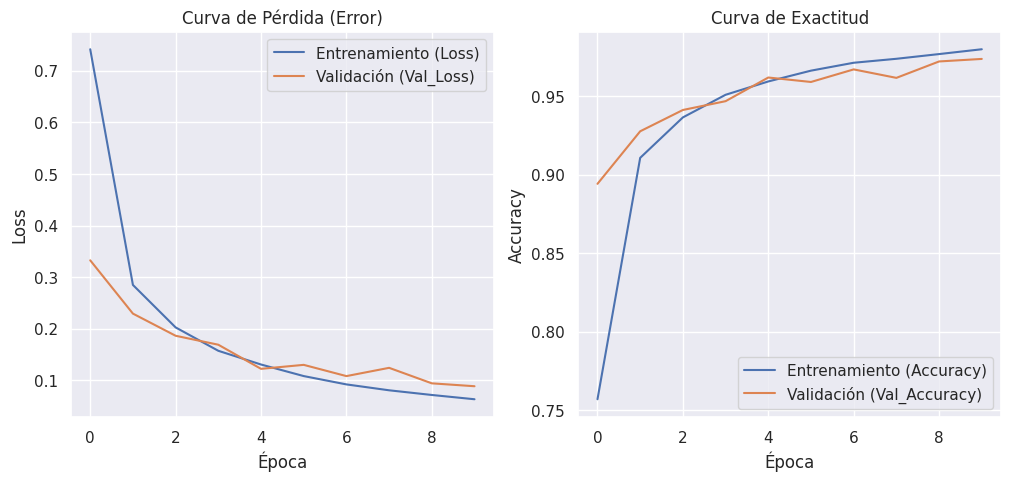

In [12]:
plt.figure(figsize=(12, 5))

# --- GRÁFICA 1: PÉRDIDA (LOSS) ---
plt.subplot(1, 2, 1) # Lado izquierdo
plt.plot(history.history['loss'], label='Entrenamiento (Loss)')
plt.plot(history.history['val_loss'], label='Validación (Val_Loss)')
plt.title('Curva de Pérdida (Error)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- GRÁFICA 2: EXACTITUD (ACCURACY) ---
plt.subplot(1, 2, 2) # Lado derecho
plt.plot(history.history['accuracy'], label='Entrenamiento (Accuracy)')
plt.plot(history.history['val_accuracy'], label='Validación (Val_Accuracy)')
plt.title('Curva de Exactitud')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

## **12. Una forma alterna de implementar el modelo puede ser dada de la siguiente forma:**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# Aseguramos dimensiones (60,000 imágenes, 28x28 píxeles, 1 canal de color)
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
input_shape = (28, 28, 1)

# Definimos el nuevo modelo
model = Sequential()

# Convolución + MaxPool
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# model.add(Dropout(0.25))

# Convolución + MaxPool
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# model.add(Dropout(0.25))

# Clasificación
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

print("Modelo alternativo definido (aún no entrenado).")
model.summary()

Modelo alternativo definido (aún no entrenado).


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,802 (354.70 KB)

 Trainable params: 90,802 (354.70 KB)

 Non-trainable params: 0 (0.00 B)

## **13. Emplea la arquitectura anterior para el dataset cifar100, empleando BatchNormalization y dropout... intenta agregar, lineas como las siguientes en los lugares mas estrategicos**

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


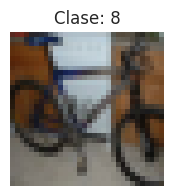

Forma de los datos: (50000, 32, 32, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 2,217,348 (8.46 MB)

 Trainable params: 2,215,940 (8.45 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [14]:
from tensorflow.keras.layers import BatchNormalization

#  Cargamos el dataset CIFAR-100
(train_image, train_label), (test_image, test_label) = keras.datasets.cifar100.load_data()

# Normalizamos
train_image = train_image / 255.0
test_image = test_image / 255.0

# Visualizamos una imagen de ejemplo
plt.figure(figsize=(2, 2))
plt.imshow(train_image[30])
plt.axis('off')
plt.title(f"Clase: {train_label[30][0]}")
plt.show()

print(f"Forma de los datos: {train_image.shape}")


keras.backend.clear_session() # Limpiamos memoria

model = Sequential([

    # Extracción de características
    # Conv -> BatchNormalization -> Activación -> MaxPool -> Dropout
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # Más profundidad
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # Clasificación
    keras.layers.Flatten(),

    keras.layers.Dense(512),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),

    # Salida: 100 neuronas (porque son 100 clases)
    keras.layers.Dense(100, activation='softmax')
])

model.summary()

## **14. Emplea el siguiente compilador... El optimizador de NAdam...**

In [15]:
# Compilamos el modelo con el optimizador Nadam
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **15. Emplea early_stooping y realiza el fit**

In [16]:
# Definimos el Callback
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Entrenamos
# Usamos batch_size=64 para que actualice los pesos cada 64 imágenes
history = model.fit(train_image,
                    train_label,
                    epochs=30,
                    validation_split=0.2,
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 303s 473ms/step - accuracy: 0.0995 - loss: 4.1456 - val_accuracy: 0.2372 - val_loss: 3.1495
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 284s 454ms/step - accuracy: 0.2740 - loss: 2.9306 - val_accuracy: 0.3299 - val_loss: 2.6522
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 449ms/step - accuracy: 0.3609 - loss: 2.4899 - val_accuracy: 0.3904 - val_loss: 2.3475
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 328s 458ms/step - accuracy: 0.4082 - loss: 2.2399 - val_accuracy: 0.4005 - val_loss: 2.3568
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 288s 460ms/step - accuracy: 0.4499 - loss: 2.0692 - val_accuracy: 0.4546 - val_loss: 2.0665
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 274s 439ms/step - accuracy: 0.4825 - loss: 1.9174 - val_accuracy: 0.4437 - val_loss: 2.1169
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 321s 438ms/step - accuracy: 0.5108 - loss: 1.8026 - val_accuracy: 0.4633 - val_loss: 2.0215
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 437ms/step - accuracy: 0.5342 -

In [17]:
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `wget [https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg](https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg) -O indian_elephant.jpg'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `wget [https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg](https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg) -O african_elephant.jpg'
--2026-01-28 09:49:05--  https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response..

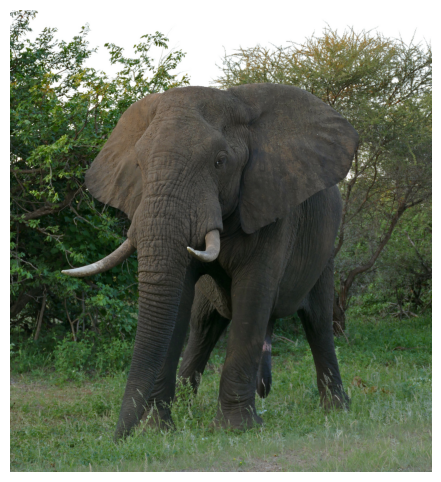

Tamaño original de la imagen: (4000, 3648, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step

 PREDICCIÓN:
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[('n02504458', 'African_elephant', np.float32(0.90143245)), ('n01871265', 'tusker', np.float32(0.08966324)), ('n02504013', 'Indian_elephant', np.float32(0.008881166))]


In [20]:
import matplotlib.image as mpimg
from keras.preprocessing import image

# Descargamos dos fotos de elefantes (Indio y Africano) desde Wikipedia
!wget [https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg](https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg) -O indian_elephant.jpg
!wget [https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg](https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg) -O african_elephant.jpg
!wget -O african_elephant.jpg https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg

# Elegimos cuál clasificar
img_path = 'african_elephant.jpg'

# Mostramos la imagen
img = mpimg.imread(img_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()
print(f"Tamaño original de la imagen: {img.shape}")

model_vgg = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)

# Cargamos la imagen redimensionándola a 224x224
img_ready = image.load_img(img_path, target_size=(224, 224))

# Convertimos a array y agregamos una dimensión extra
x = image.img_to_array(img_ready)
x = np.expand_dims(x, axis=0)

# Preprocesamos
x = keras.applications.vgg16.preprocess_input(x)

# Predicción
features = model_vgg.predict(x)

# Decodificamos la predicción para ver los nombres reales
print("\n PREDICCIÓN:")
print(keras.applications.vgg16.decode_predictions(features, top=3)[0])